# Construct circuits

<details>
<summary><b>Package versions</b></summary>

The code on this page was developed using the following requirements.
We recommend using these versions or newer.

```
qiskit[all]~=2.1.1
```
</details>

This page takes a closer look at the [`QuantumCircuit`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit) class in the Qiskit SDK, including some more advanced methods you can use to create quantum circuits.

## What is a quantum circuit?

A simple quantum circuit is a collection of qubits and a list of instructions that act on those qubits. To demonstrate, the following cell creates a new circuit with two new qubits, then displays the circuit's [`qubits`](/api/qiskit/qiskit.circuit.QuantumCircuit#qubits) attribute, which is a list of [`Qubits`](/api/qiskit/circuit#qiskit.circuit.Qubit) in order from the least significant bit $q_0$ to the most significant bit $q_n$.

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.qubits

[<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]

Multiple `QuantumRegister` and `ClassicalRegister` objects can be combined to create a circuit. Every [`QuantumRegister`](/api/qiskit/circuit#qiskit.circuit.QuantumRegister) and [`ClassicalRegister`](/api/qiskit/circuit#qiskit.circuit.ClassicalRegister) can also be named.

In [2]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(2, 'qreg1') # Create a QuantumRegister with 2 qubits
qr2 = QuantumRegister(1, 'qreg2') # Create a QuantumRegister with 1 qubit
cr1 = ClassicalRegister(3, 'creg1') # Create a ClassicalRegister with 3 cbits

combined_circ = QuantumCircuit(qr1, qr2, cr1) # Create a quantum circuit with 2 QuantumRegisters and 1 ClassicalRegister
combined_circ.qubits

[Qubit(QuantumRegister(2, 'qreg1'), 0),
 Qubit(QuantumRegister(2, 'qreg1'), 1),
 Qubit(QuantumRegister(1, 'qreg2'), 0)]

You can find a qubit's index and register by using the circuit's [`find_bit`](/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.find_bit) method and its attributes.

In [3]:
desired_qubit = qr2[0] # Qubit 0 of register 'qreg2'

print("Index:", combined_circ.find_bit(desired_qubit).index)
print("Register:", combined_circ.find_bit(desired_qubit).registers)

Index: 2
Register: [(QuantumRegister(1, 'qreg2'), 0)]


Adding an instruction to the circuit appends the instruction to the circuit's [`data`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#data) attribute. The following cell output shows `data` is a list of [`CircuitInstruction`](/docs/api/qiskit/qiskit.circuit.CircuitInstruction) objects, each of which has an `operation` attribute, and a `qubits` attribute.

In [4]:
qc.x(0) # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=())]

The easiest way to view this information is through the [`draw`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#draw) method, which returns a visualization of a circuit. See [Visualize circuits](./visualize-circuits) for different ways of displaying quantum circuits.

In [5]:
qc.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/43a57258-3e33-4071-8a48-2bf127c8a5be-0.svg" alt="Output of the previous code cell" />

Circuit instruction objects can contain "definition" circuits that describe the instruction in terms of more fundamental instructions. For example, the [X-gate](/docs/api/qiskit/qiskit.circuit.library.XGate) is defined as a specific case of the [U3-gate](/docs/api/qiskit/qiskit.circuit.library.U3Gate), a more general single-qubit gate.

In [6]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/653e2427-e301-4d2f-84de-1959185ace8e-0.svg" alt="Output of the previous code cell" />

Instructions and circuits are similar in that they both describe operations on bits and qubits, but they have different purposes:

- Instructions are treated as fixed, and their methods will usually return new instructions (without mutating the original object).
- Circuits are designed to be built over many lines of code, and [`QuantumCircuit`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit) methods often mutate the existing object.

### What is circuit depth?

The [depth()](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.depth) of a quantum circuit is a measure of the number of “layers” of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. Because quantum gates take time to implement, the depth of a circuit roughly corresponds to the amount of time it takes the quantum computer to execute the circuit. Thus, the depth of a circuit is one important quantity used to measure if a quantum circuit can be run on a device.

The rest of this page illustrates how to manipulate quantum circuits.

## Build circuits

Methods such as [`QuantumCircuit.h`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#h) and [`QuantumCircuit.cx`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#cx) add specific instructions to circuits. To add instructions to a circuit more generally, use the [`append`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#append) method. This takes an instruction and a list of qubits to apply the instruction to. See the [Circuit Library API documentation](/docs/api/qiskit/circuit_library) for a list of supported instructions.

In [7]:
from qiskit.circuit.library import HGate

qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0],  # Apply to qubit 0
)
qc.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/66813cae-9841-47ea-96b7-8fd7b82e9759-0.svg" alt="Output of the previous code cell" />

To combine two circuits, use the [`compose`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#compose) method. This accepts another [`QuantumCircuit`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit) and an optional list of qubit mappings.

<Admonition type="note">
    The [`compose`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#compose) method returns a new circuit and does **not** mutate either circuit it acts on. To mutate the circuit on which you're calling the [`compose`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#compose) method, use the argument `inplace=True`.
</Admonition>

In [8]:
qc_a = QuantumCircuit(4)
qc_a.x(0)

qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)

# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/29152dfa-2275-4bc4-aadb-82185b9e0e86-0.svg" alt="Output of the previous code cell" />

You might also want to compile circuits into instructions to keep your circuits organized. You can convert a circuit to an instruction by using the [`to_instruction`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#to_instruction) method, then append this to another circuit as you would any other instruction. The circuit drawn in the following cell is functionally equivalent to the circuit drawn in the previous cell.

In [9]:
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])
qc_a.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/81b682dd-45cb-4492-809e-d9e8ebbf5600-0.svg" alt="Output of the previous code cell" />

If your circuit is unitary, you can convert it to a [`Gate`](/docs/api/qiskit/qiskit.circuit.Gate)  by using the [`to_gate`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#to_gate) method. [`Gate`](/docs/api/qiskit/qiskit.circuit.Gate) objects are specific types of instructions that have some extra features, such as the [`control`](/docs/api/qiskit/qiskit.circuit.Gate#control) method, which adds a quantum control.

In [10]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/ed362e64-d6a4-4dfd-a5cf-5e6bdc7a81b5-0.svg" alt="Output of the previous code cell" />

To see what's going on, you can use the [`decompose`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#decompose) method to expand each instruction into its definition.

<Admonition type="note">
    The [`decompose`](/docs/api/qiskit/qiskit.circuit.QuantumCircuit#decompose) method returns a new circuit and does **not** mutate the circuit it acts on.
</Admonition>

In [11]:
qc_a.decompose().draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/3c0633db-929b-4428-a888-7a3d493bd6dd-0.svg" alt="Output of the previous code cell" />

## Measure qubits

Measurements can be used to get the final results from the quantum register to the classical register. Note that if you are submitting circuits to a Sampler primitive, measurements are required. However, circuits submitted to an Estimator primitive cannot contain measurements.

Qubits can be measured using three methods: [`measure`](/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.measure), [`measure_all`](/api/qiskit/qiskit.circuit.QuantumCircuit#measure_all) and [`measure_active`](/api/qiskit/qiskit.circuit.QuantumCircuit#measure_active). To learn how to visualize measured results, see the [Visualize results](/guides/visualize-results) page.

1. `QuantumCircuit.measure` : measures each qubit in the first argument onto the classical bit given as the second argument. This method allows full control over where the measurement result is stored.

2. `QuantumCircuit.measure_all` : takes no argument and can be used for quantum circuits without pre-defined classical bits. It creates classical wires and stores measurement results in order. For example, measurement of  qubit $q_i$ is stored in cbit $meas_i$). It also adds a barrier before the measurement.

3. `QuantumCircuit.measure_active` : similar to `measure_all`, but measures only qubits that have operations.

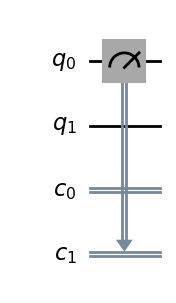

In [12]:
qc1 = QuantumCircuit(2, 2)
qc1.measure(0, 1)
qc1.draw("mpl", cregbundle=False)

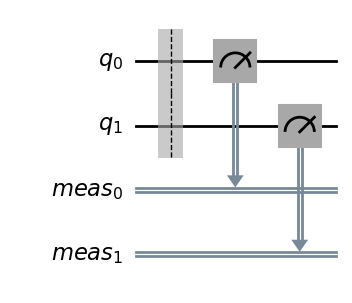

In [13]:
qc2 = QuantumCircuit(2)
qc2.measure_all()
qc2.draw("mpl", cregbundle=False)

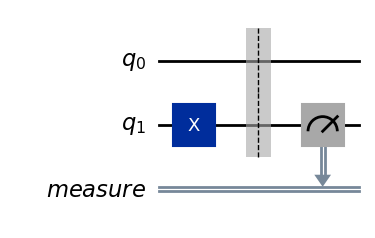

In [14]:
qc3 = QuantumCircuit(2)
qc3.x(1)
qc3.measure_active()
qc3.draw("mpl", cregbundle=False)

## Parameterized circuits

Many near-term quantum algorithms involve executing many variations of a quantum circuit. Since constructing and optimizing large circuits can be computationally expensive, Qiskit supports **parameterized** circuits. These circuits have undefined parameters, and their values do not need to be defined until just before executing the circuit. This lets you move circuit construction and optimization out of the main program loop.  The following cell creates and displays a parameterized circuit.

In [15]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit import Parameter

angle = Parameter("angle")  # undefined number

# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
qc = generate_preset_pass_manager(
    optimization_level=3, basis_gates=["u", "cx"]
).run(qc)

qc.draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/a580552c-d585-4047-99f0-32aafd06e4f3-0.svg" alt="Output of the previous code cell" />

The following cell creates many variations of this circuit and displays one of the variations.

In [16]:
circuits = []
for value in range(100):
    circuits.append(qc.assign_parameters({angle: value}))

circuits[0].draw("mpl")

<Image src="/docs/images/guides/construct-circuits/extracted-outputs/85af6231-921a-4130-99d3-f6998f761df8-0.svg" alt="Output of the previous code cell" />

You can find a list of a circuit's undefined parameters in its `parameters` attribute.

In [17]:
qc.parameters

ParameterView([Parameter(angle)])

<CodeAssistantAdmonition
  tagLine="Forgotten the method name? Try asking Qiskit Code Assistant."
  prompts={[
    "# Assign all parameters in qc to 0"
  ]}
/>

## Next steps

<Admonition type="tip" title="Recommendations">
  -  To learn about near-term quantum algorithms, take the [Variational algorithm design](/learning/courses/variational-algorithm-design) course.
  -  See an example of circuits being used in the [Grover's Algorithm](/docs/tutorials/grovers-algorithm) tutorial.
  -  Work with simple circuits using [IBM Quantum Composer](/docs/guides/composer).
</Admonition>